<a href="https://colab.research.google.com/github/ECV21/Course-Data-Analysis-with-Python-FreeCodeCamp/blob/main/Introduction_to_Data_Analysis_FreeCodeCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Data Analysis Example A

##Bike store sales


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
#read file csv in python
sales = pd.read_csv('sales_data.csv')
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


In [6]:
#What's the mean of Customers_Age?

sales['Customer_Age'].mean()

36.14143660866152

<Axes: ylabel='Density'>

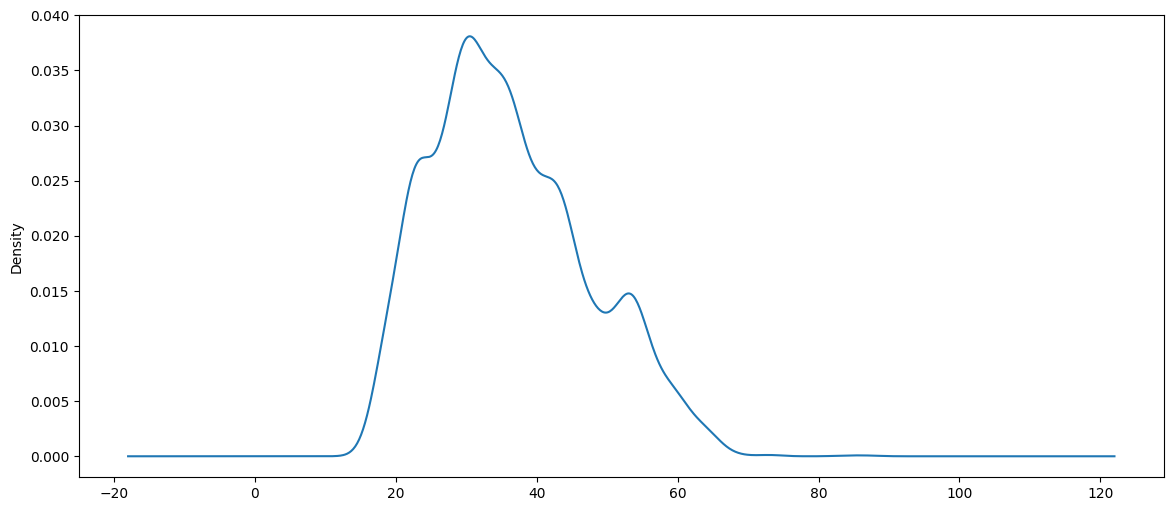

In [7]:
#Go ahead and show a density (KDE) and a box plot with the Customer_Age data:

sales['Customer_Age'].plot(kind='kde', figsize=(14,6))

<Axes: >

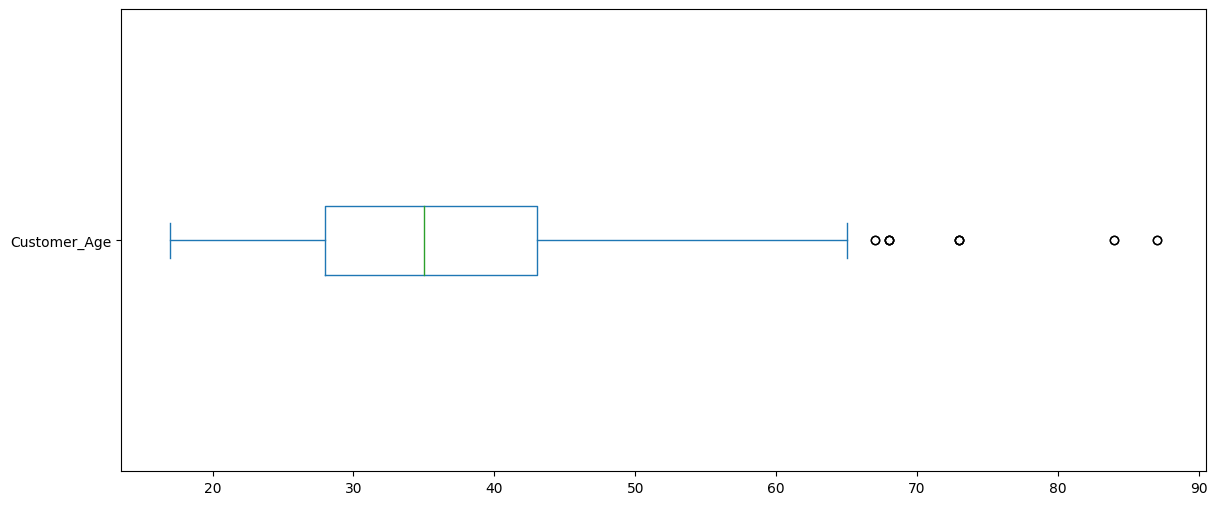

In [8]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

In [9]:
#What's the mean of Order_Quantity?
sales['Order_Quantity'].mean()

14.03559277676001

<Axes: ylabel='Frequency'>

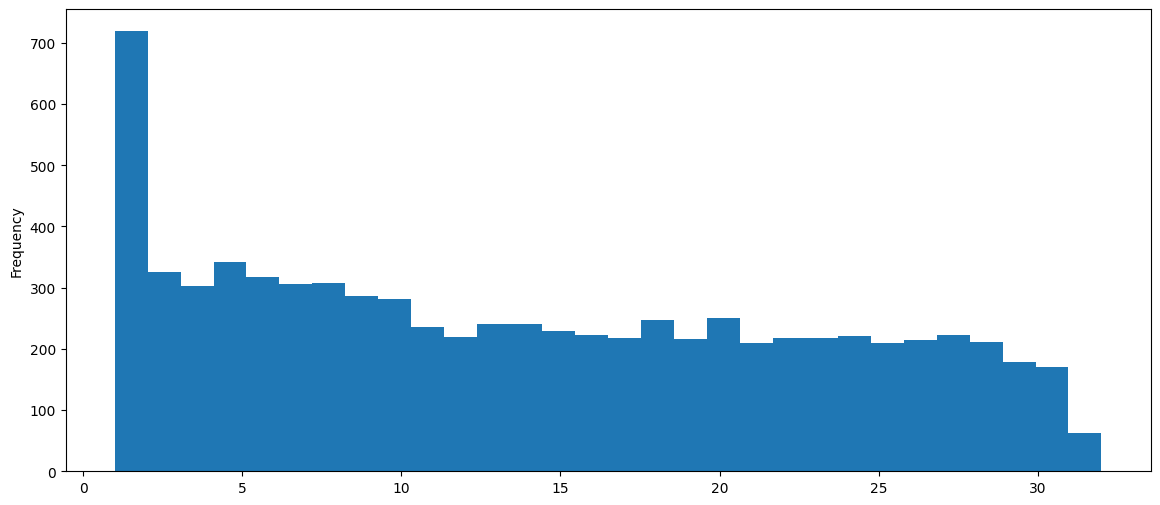

In [12]:
#Go ahead and show a histogram and a box plot with the Order_Quantity data:
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,6))

<Axes: >

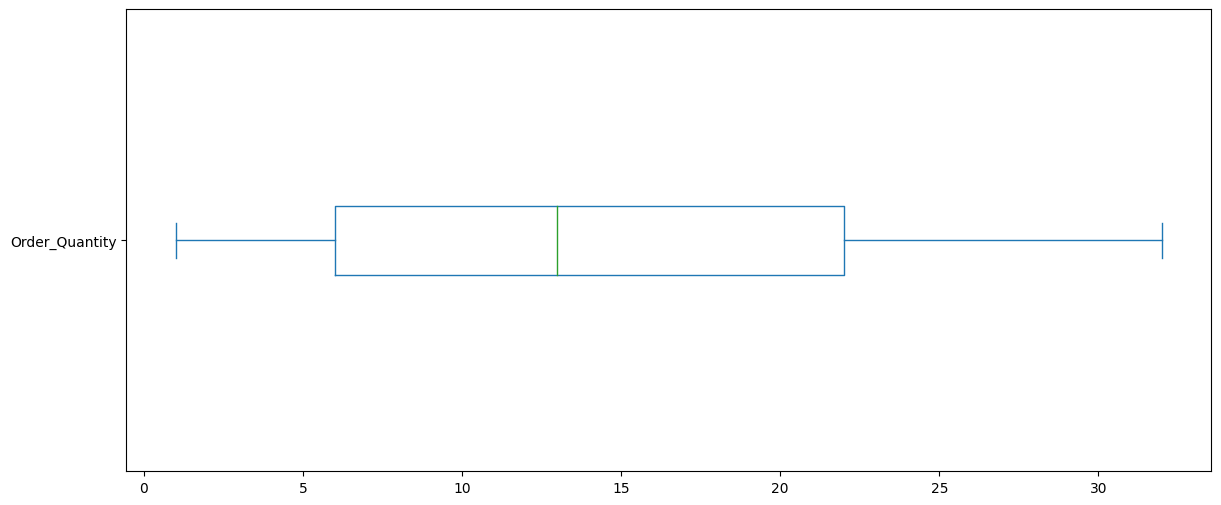

In [13]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

In [15]:
#How many sales per year do we have?
sales['Year'].value_counts()

Year
2014    2251
2016    2250
2013    1571
2015    1571
Name: count, dtype: int64

<Axes: ylabel='count'>

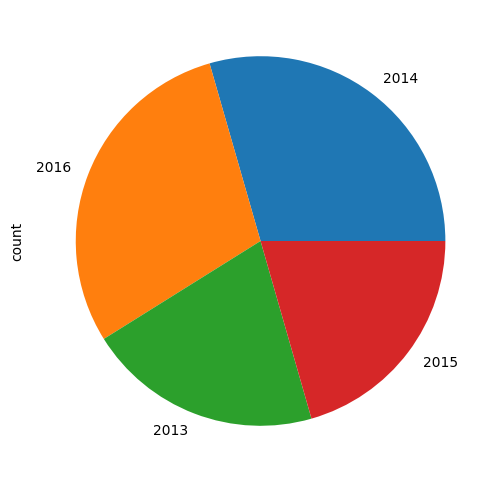

In [16]:
#Go ahead and show a pie plot with the previous data:

sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

In [17]:
#How many sales per month do we have?
sales['Month'].value_counts()

Month
June         799
March        778
December     752
May          716
April        686
February     672
January      610
October      578
November     562
September    514
August       508
July         468
Name: count, dtype: int64

<Axes: xlabel='Month'>

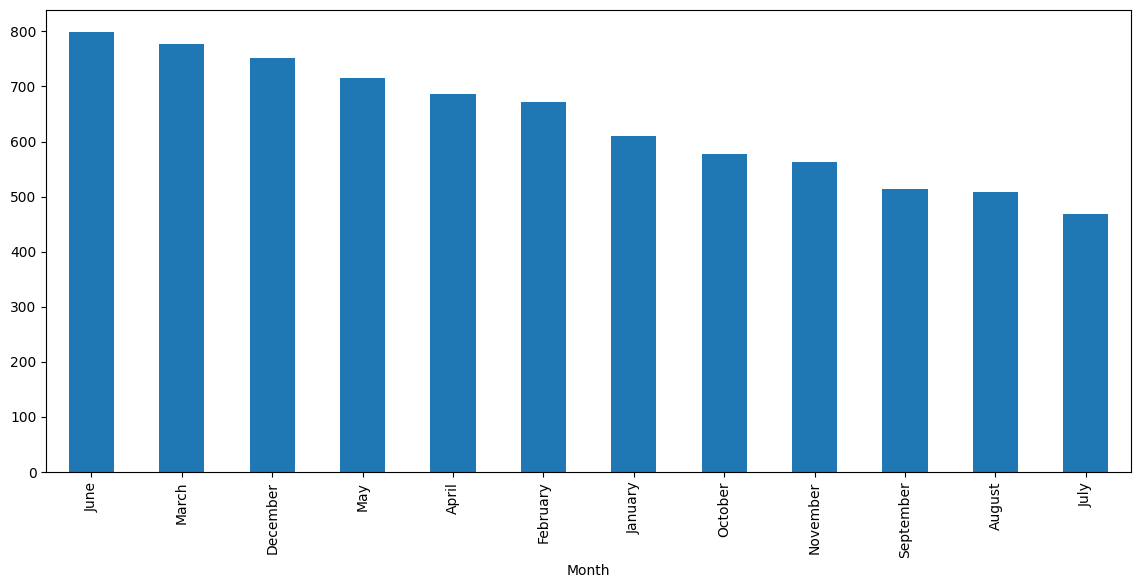

In [19]:
#Go ahead and show a bar plot with the previous data:
sales['Month'].value_counts().plot(kind='bar', figsize=(14,6))

In [20]:
#Which country has the most sales quantity of sales?
sales['Country'].value_counts().head(1)


Country
United States    2498
Name: count, dtype: int64

In [21]:
sales['Country'].value_counts()

Country
United States     2498
Canada            1290
Australia         1186
United Kingdom    1067
France             826
Germany            776
Name: count, dtype: int64

<Axes: xlabel='Country'>

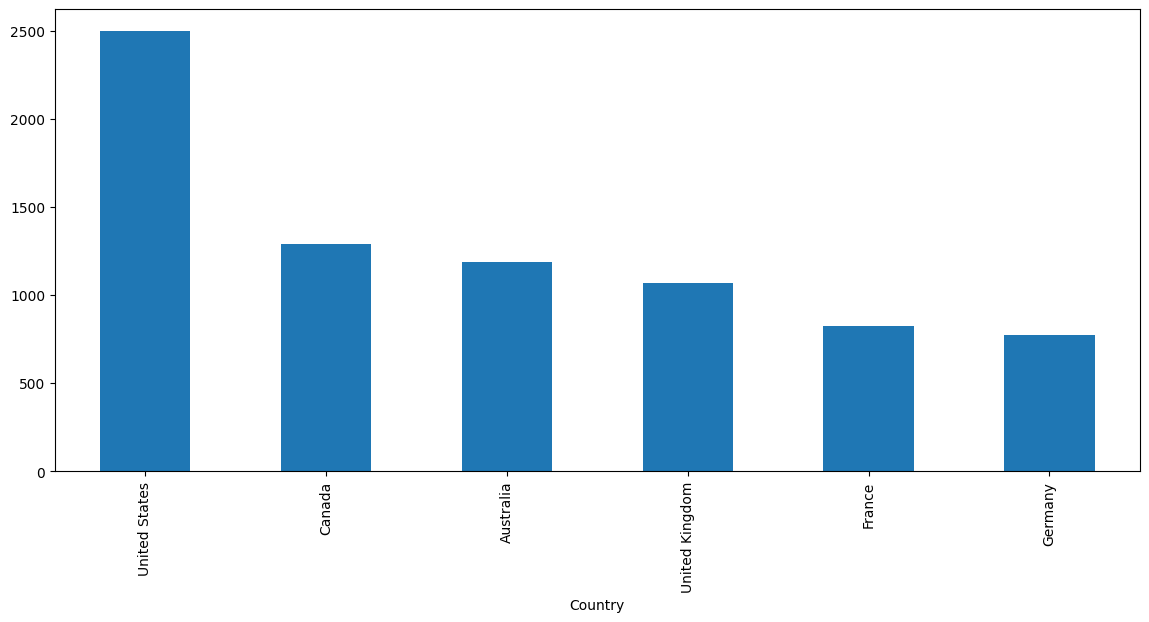

In [22]:
#Go ahead and show a bar plot of the sales per country:

sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

In [23]:
#Create a list of every product sold
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'Water Bottle - 30 o'], dtype=object)

<Axes: xlabel='Product'>

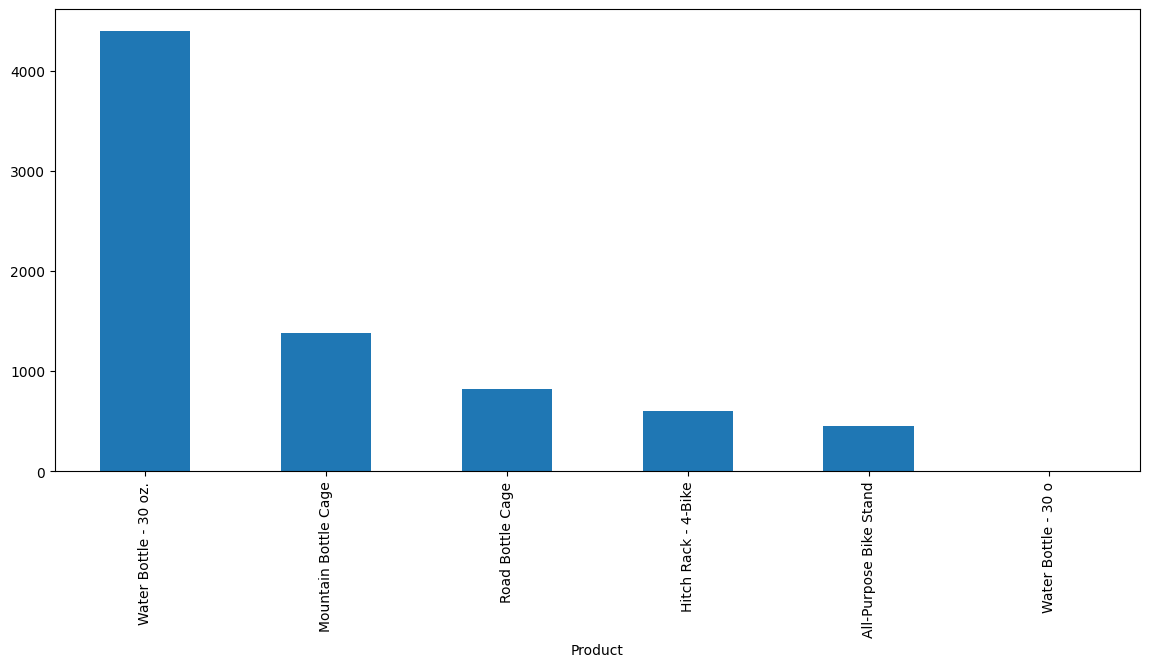

In [24]:
#Create a bar plot showing the 10 most sold products (best sellers):
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

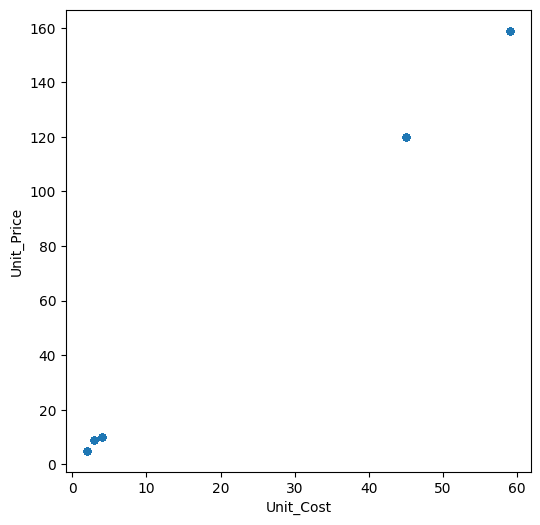

In [25]:
#Can you see any relationship between Unit_Cost and Unit_Price?

sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6)) #show scatter plot between unitcost and unitPrice

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

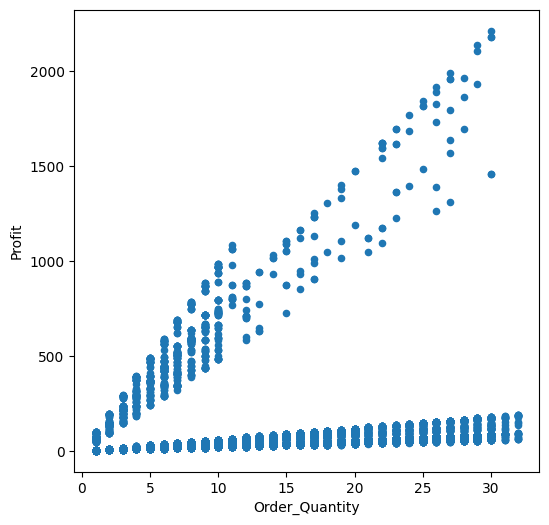

In [26]:
#Can you see any relationship between Order_Quantity and Profit?
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

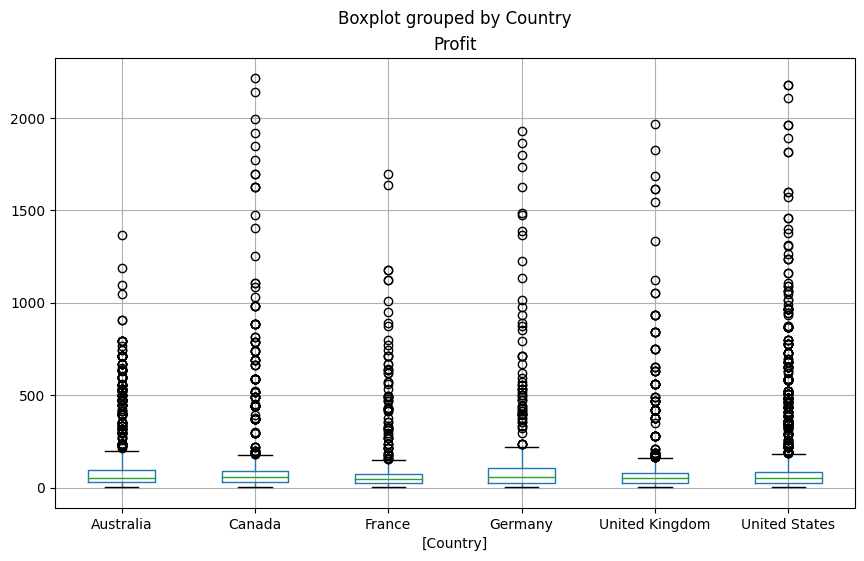

In [27]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

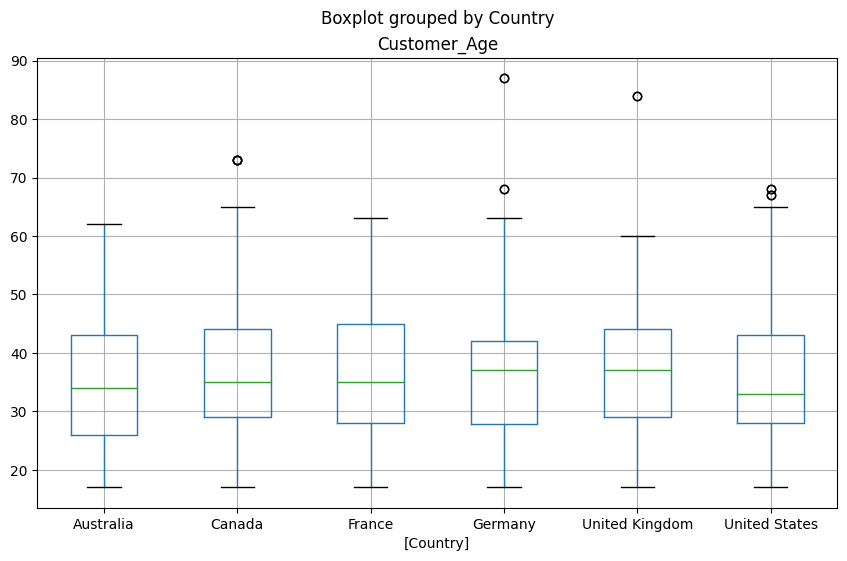

In [28]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

In [29]:
#Add and calculate a new Calculated_Date column
##Use Day, Month, Year to create a Date column (YYYY-MM-DD).

sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

In [30]:
#Parse your Calculated_Date column into a datetime object

sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

<Axes: xlabel='Calculated_Date'>

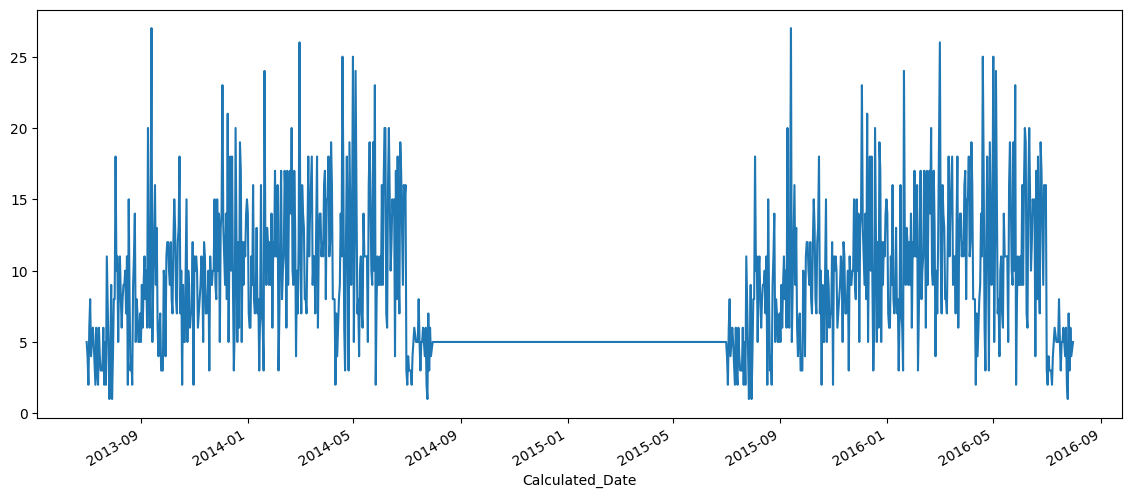

In [31]:
#How did sales evolve through the years?
#Show a line plot using Calculated_Date column as the x-axis and the count of sales as the y-axis.


sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

In [32]:
#Increase 50 U$S revenue to every sale

#sales['Revenue'] = sales['Revenue'] + 50

sales['Revenue'] += 50

In [33]:
#How many orders were made in Canada or France?

sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

2116

In [34]:
#How many Bike Racks orders were made from Canada?

sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

104

In [35]:
#How many orders were made in each region (state) of France?


france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()

france_states

State
Seine Saint Denis    170
Seine (Paris)        146
Essonne              102
Nord                  94
Hauts de Seine        64
Yveline               58
Loiret                42
Seine et Marne        36
Moselle               22
Val de Marne          20
Val d'Oise            18
Garonne (Haute)       16
Charente-Maritime     12
Loir et Cher          10
Pas de Calais          8
Somme                  8
Name: count, dtype: int64

<Axes: xlabel='State'>

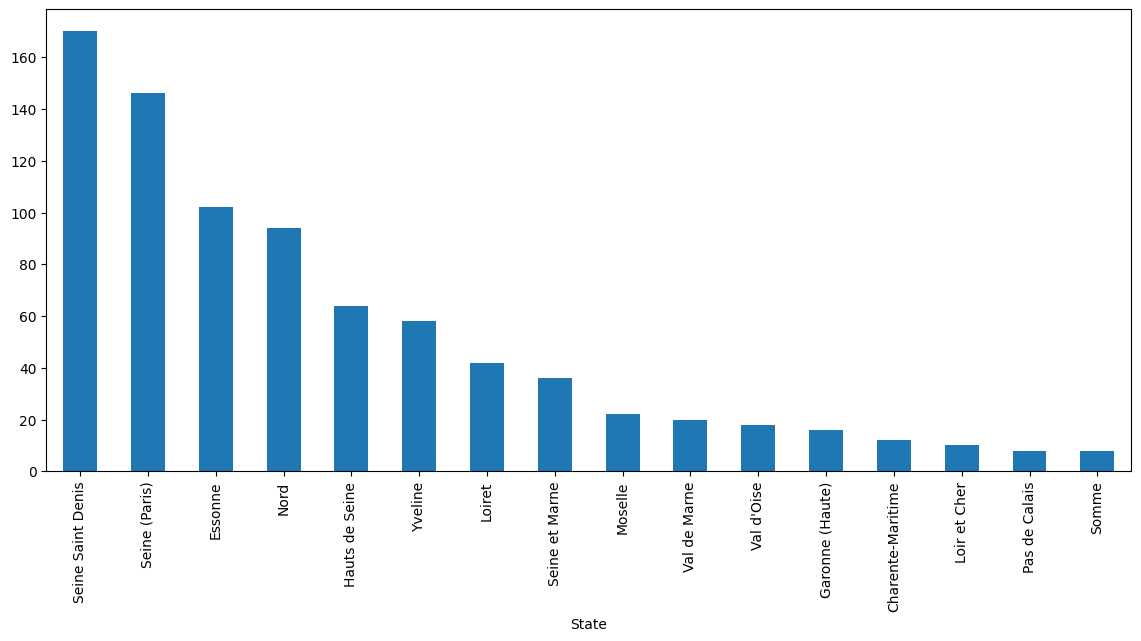

In [36]:
france_states.plot(kind='bar', figsize=(14,6))

In [37]:
#How many sales were made per category?

sales['Product_Category'].value_counts()

Product_Category
Accessories    7643
Name: count, dtype: int64

<Axes: ylabel='count'>

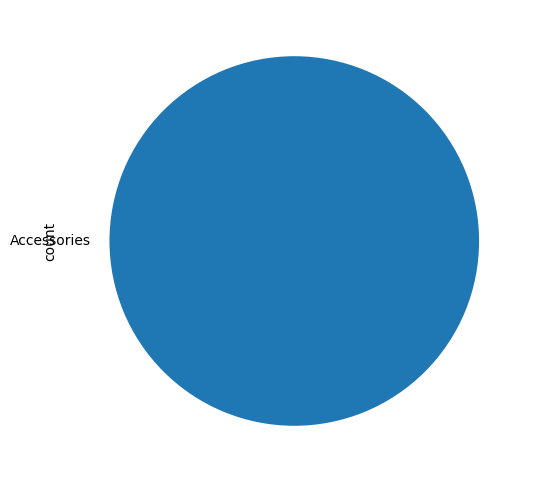

In [38]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

In [39]:
#How many orders were made per accessory sub-categories?

accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Sub_Category
Bottles and Cages    6595
Bike Racks            592
Bike Stands           456
Name: count, dtype: int64

<Axes: xlabel='Sub_Category'>

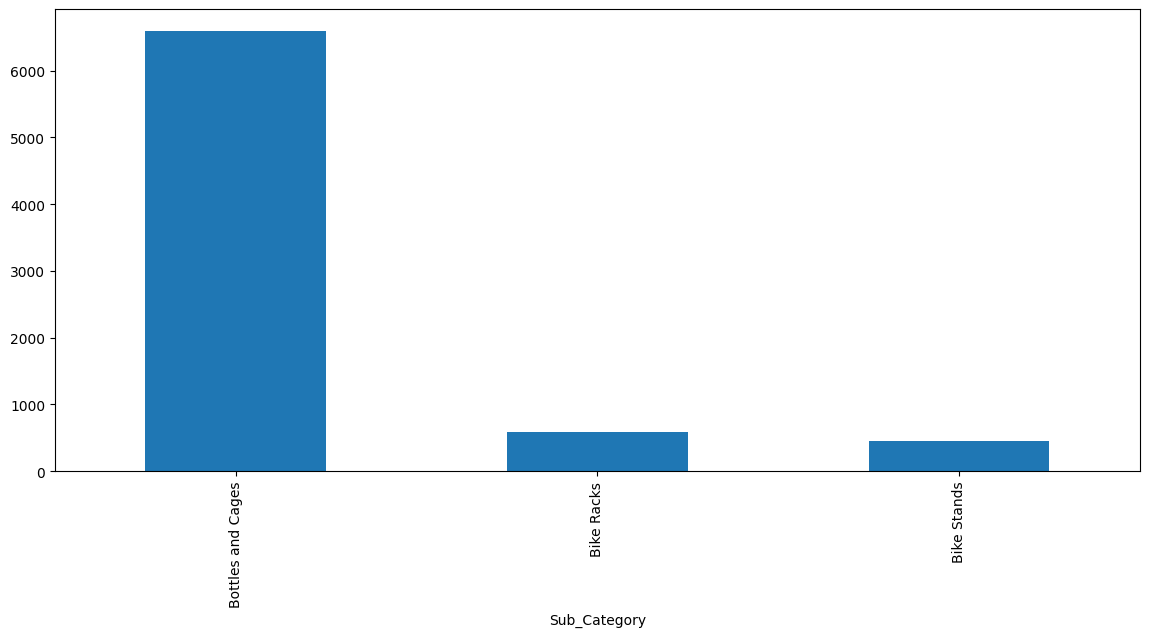

In [40]:
accessories.plot(kind='bar', figsize=(14,6))

In [43]:
#How many orders were made per bike sub-categories?

bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

bikes

Series([], Name: count, dtype: int64)

<Axes: ylabel='count'>

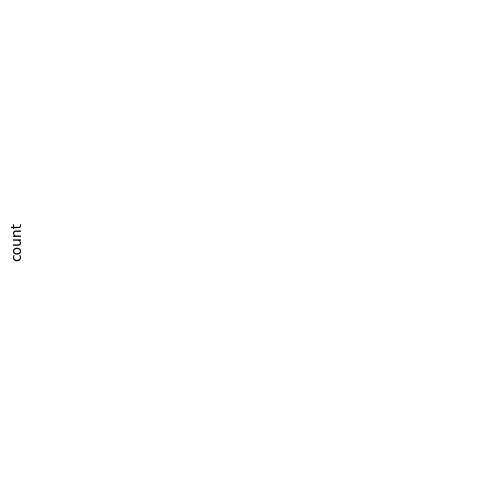

In [42]:
bikes.plot(kind='pie', figsize=(6,6))

In [45]:
#Which gender has the most amount of sales?

sales['Customer_Gender'].value_counts()

Customer_Gender
M    3976
F    3667
Name: count, dtype: int64

<Axes: xlabel='Customer_Gender'>

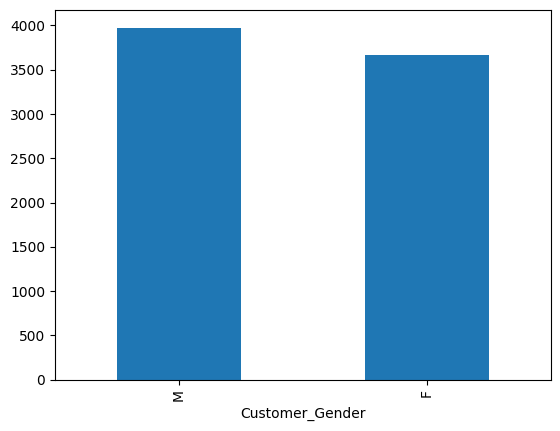

In [46]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Customer_Gender'>

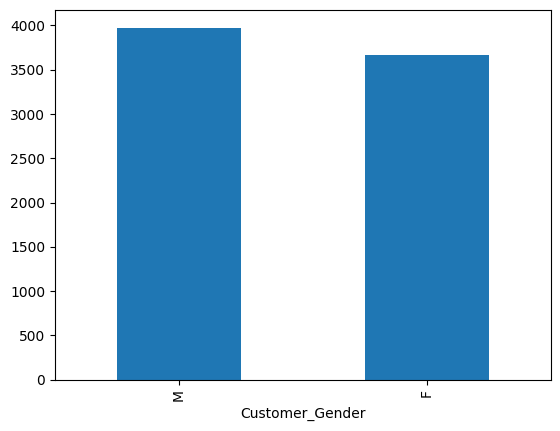

In [47]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

In [48]:
#How many sales with more than 500 in Revenue were made by men?

sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)].shape[0]

0

In [49]:
#Get the top-5 sales with the highest revenue

sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
245,2016-01-07,7,January,2016,31,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,30.0,45.0,120.0,2214.0,1350.0,3614.0,2016-01-07
90,2014-02-12,12,February,2014,46,Adults (35-64),M,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,30.0,45.0,120.0,2178.0,1350.0,3578.0,2014-02-12
182,2014-01-17,17,January,2014,53,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,30.0,45.0,120.0,2178.0,1350.0,3578.0,2014-01-17
244,2014-01-07,7,January,2014,31,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,29.0,45.0,120.0,2140.0,1305.0,3495.0,2014-01-07
183,2016-01-17,17,January,2016,53,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,29.0,45.0,120.0,2105.0,1305.0,3460.0,2016-01-17


In [50]:
#Get the sale with the highest revenue

cond = sales['Revenue'] == sales['Revenue'].max()

sales.loc[cond]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
245,2016-01-07,7,January,2016,31,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,30.0,45.0,120.0,2214.0,1350.0,3614.0,2016-01-07


In [51]:
#What is the mean Order_Quantity of orders with more than 10K in revenue?

cond = sales['Revenue'] > 10_000

sales.loc[cond, 'Order_Quantity'].mean()

nan

In [52]:
#What is the mean Order_Quantity of orders with less than 10K in revenue?

cond = sales['Revenue'] < 10_000

sales.loc[cond, 'Order_Quantity'].mean()

14.03559277676001

In [53]:
#How many orders were made in May of 2016?

cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')

sales.loc[cond].shape[0]

358

In [54]:
#How many orders were made between May and July of 2016?

cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))

sales.loc[cond].shape[0]

877

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

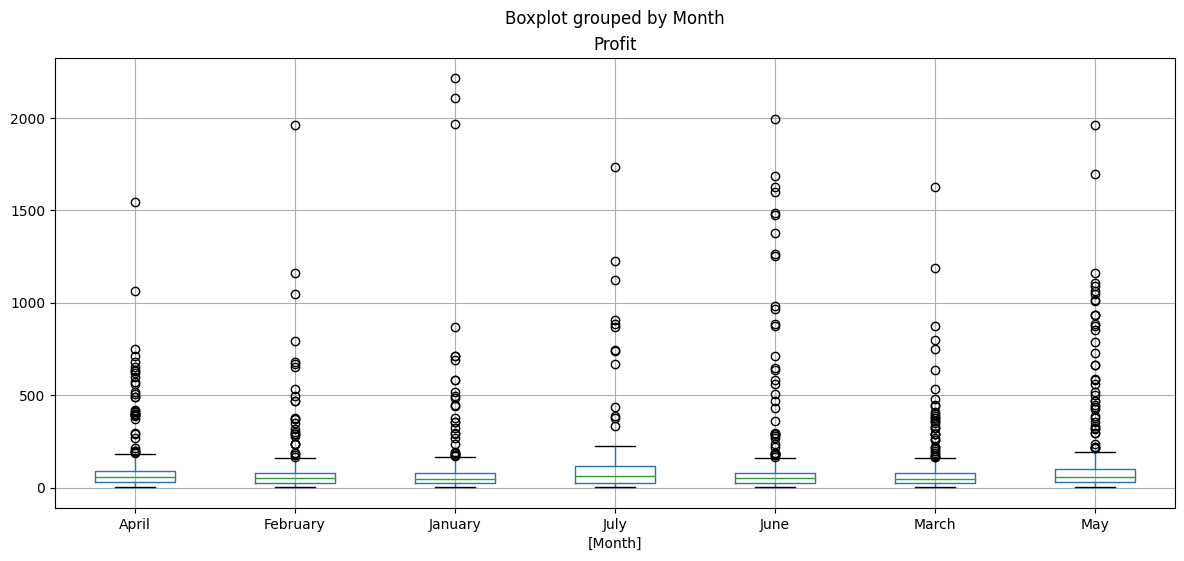

In [55]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]

profit_2016.boxplot(by='Month', figsize=(14,6))

In [56]:
#Add 7.2% TAX on every sale Unit_Price within United States


In [57]:
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] = sales.loc[sales['Country'] == 'United States', 'Unit_Price'] * 1.072

#sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072